<a href="https://colab.research.google.com/github/guilhermelaviola/InterMilan/blob/main/CurrentSquad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python-dateutil

In [2]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from datetime import datetime, date
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-2-db3af1e1316c>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In [3]:
# Importing and displaying the last 10 goals scored:
df = pd.ExcelFile('INTER.xlsx')
squad = pd.read_excel(df, 'Full squad')
squad.tail(10)

,Number,Position,Nationality,Player,Contract until,Date of birth
34,—,FW,Italy,Sebastiano Esposito,2025-06-30,2002-07-02
35,—,FW,Italy,Gaetano Oristanio,NaT,2002-09-28
36,—,FW,Italy,Eddie Salcedo,NaT,2001-10-01
37,—,FW,Uruguay,Martín Satriano,2027-06-30,2001-02-20
38,—,FW,Poland,Jan Żuberek,NaT,2004-03-13
39,7,DF,Colombia,Juan Cuadrado,2024-06-30,1988-05-26
40,5,MF,Italy,Stefano Sensi,2024-06-30,1995-08-05
41,14,MF,Netherlands,Davy Klaassen,2024-06-30,1991-02-21
42,70,FW,Chile,Alexis Sánchez,2024-06-30,1988-12-19
43,—,GK,Italy,William Rovida,2025-06-30,2003-03-14


In [4]:
# Displaying statistical data of the numerical data present in the dataset:
squad.describe()

,Contract until,Date of birth
count,37,44
mean,2026-05-11 20:45:24.324324352,1997-12-13 21:49:05.454545408
min,2024-06-30 00:00:00,1988-02-10 00:00:00
25%,2025-06-30 00:00:00,1994-06-27 12:00:00
50%,2026-06-30 00:00:00,1999-01-23 00:00:00
75%,2027-06-30 00:00:00,2002-07-16 00:00:00
max,2028-06-30 00:00:00,2005-06-28 00:00:00


In [5]:
# Displaying the number of rows and columns in the dataset:
squad.shape

(44, 6)

# **Plotting basic column data**

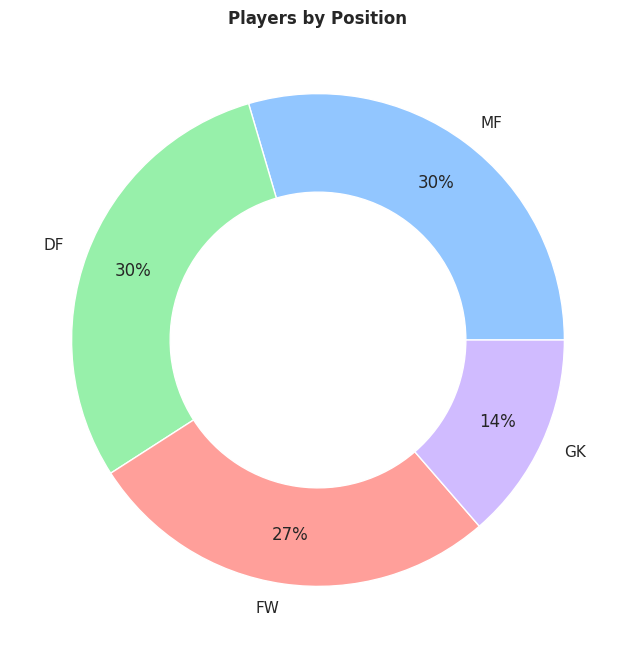

In [6]:
# Displaying players by position:
squad['Position'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Players by Position', fontweight = 'bold')
plt.show()

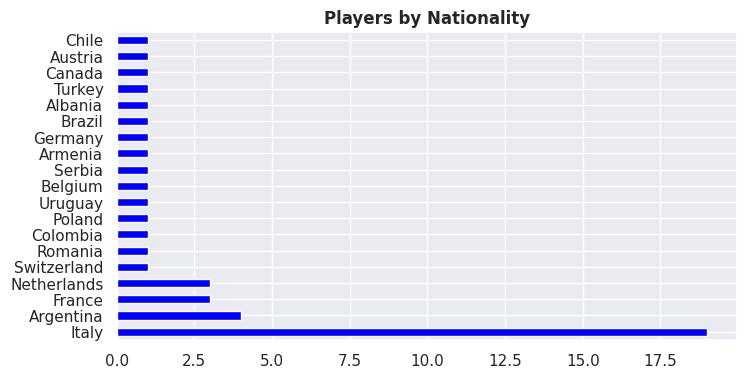

In [7]:
# Displaying players by nationality:
squad['Nationality'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Players by Nationality', fontweight = 'bold')
plt.show()

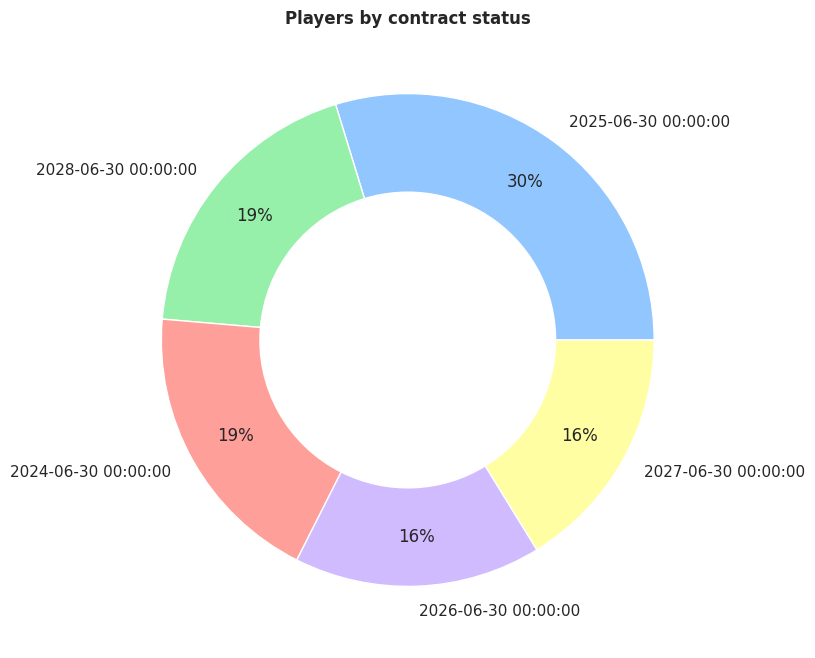

In [9]:
# Displaying players by contract status:
squad['Contract until'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Players by contract status', fontweight = 'bold')
plt.show()

In [10]:
# Creating a datetime object based on the dates from the dataset:
squad['Date of birth'] = squad['Date of birth'].map(pd.to_datetime)
squad['Birth year'] = squad['Date of birth'].apply(lambda x : x.year)

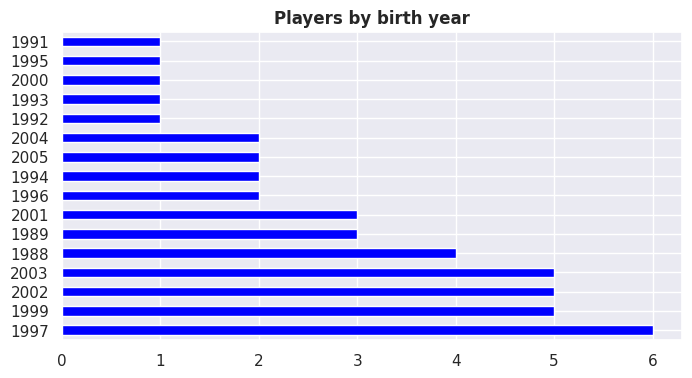

In [11]:
# Displaying players by birth year:
squad['Birth year'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Players by birth year', fontweight = 'bold')
plt.show()

In [14]:
now = date.today()
squad['Player age'] = squad.apply(lambda x: relativedelta(now, x['Date of birth']).years if x['Date of birth'] is not pd.NaT else pd.NaT, axis=1)
squad.tail(50)

,Number,Position,Nationality,Player,Contract until,Date of birth,Birth year,Player age
0,1,GK,Switzerland,Yann Sommer,2026-06-30,1988-12-17,1988,35
1,2,MF,Netherlands,Denzel Dumfries,2025-06-30,1996-04-18,1996,28
2,6,DF,Netherlands,Stefan de Vrij,2025-06-30,1992-02-05,1992,32
3,8,FW,Austria,Marko Arnautović,2025-06-30,1989-04-19,1989,35
4,9,FW,France,Marcus Thuram,2028-06-30,1997-08-06,1997,26
5,10,FW,Argentina,Lautaro Martínez,2026-06-30,1997-08-22,1997,26
6,12,GK,Italy,Raffaele Di Gennaro,2024-06-30,1993-10-03,1993,30
7,15,DF,Italy,Francesco Acerbi,2025-06-30,1988-02-10,1988,36
8,16,MF,Italy,Davide Frattesi,2028-06-30,1999-09-22,1999,24
9,17,MF,Canada,Tajon Buchanan,2028-06-30,1999-02-08,1999,25


In [17]:
# Displaying statistical data of the numerical data present in the dataset (after the creation of the 'Player age' column):
squad.describe()

,Contract until,Date of birth,Birth year,Player age
count,37,44,44.000000,44.000000
mean,2026-05-11 20:45:24.324324352,1997-12-13 21:49:05.454545408,1997.568182,26.045455
min,2024-06-30 00:00:00,1988-02-10 00:00:00,1988.000000,18.000000
25%,2025-06-30 00:00:00,1994-06-27 12:00:00,1994.000000,21.000000
50%,2026-06-30 00:00:00,1999-01-23 00:00:00,1999.000000,25.000000
75%,2027-06-30 00:00:00,2002-07-16 00:00:00,2002.000000,29.250000
max,2028-06-30 00:00:00,2005-06-28 00:00:00,2005.000000,36.000000
std,NaN,NaN,5.306414,5.282505


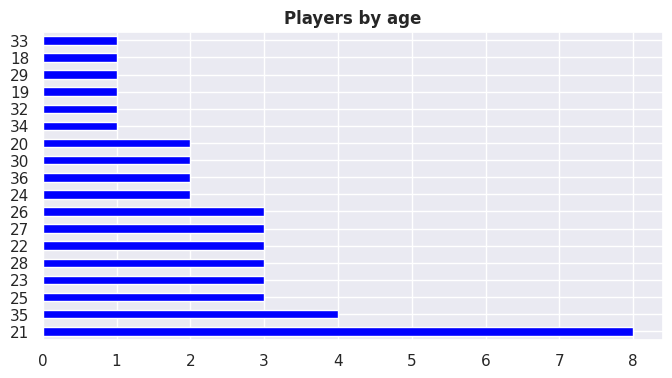

In [18]:
# Displaying players by age:
squad['Player age'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Players by age', fontweight = 'bold')
plt.show()